In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Ex. 0.: Please get yourself familiar with the data.

In [2]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [3]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Ex. 1.: Please follow the steps below.

divide the data into parameters (X) and labels/classes (y)

create theta vector

add a row with values '1' on the top of the X matrix

normalize features of X matrix

In [4]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

In [5]:
theta = np.zeros((X.shape[0]+1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

Ex. 2.: Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

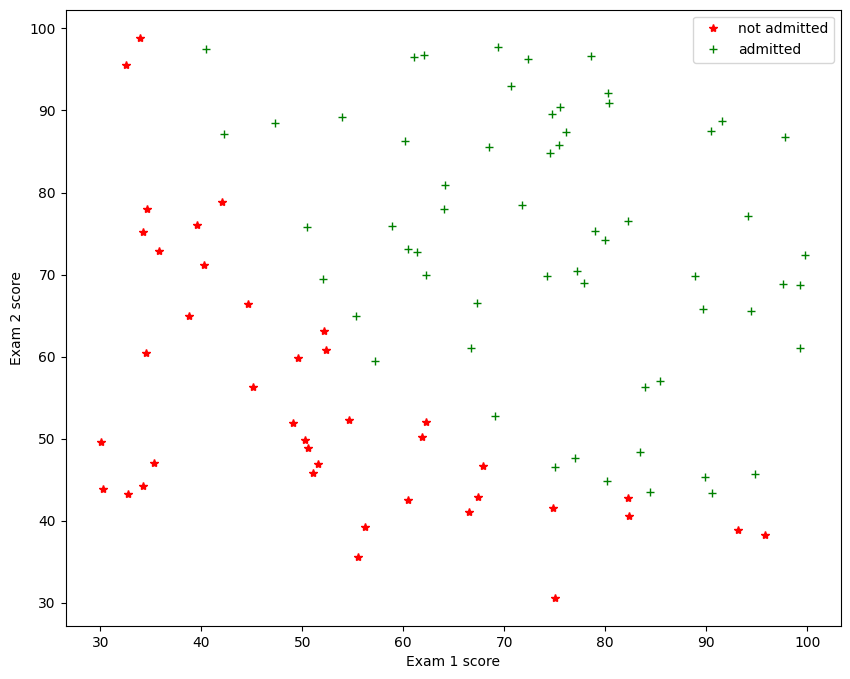

In [6]:
plt.figure(figsize=[10,8])
plt.plot(data[data["Admitted"] == 0]["Exam 1"], data[data["Admitted"] == 0]["Exam 2"], "r*", label = "not admitted")
plt.plot(data[data["Admitted"] == 1]["Exam 1"], data[data["Admitted"] == 1]["Exam 2"], "g+", label = "admitted")
plt.legend()
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()


Ex. 3.: Earlier, we said that we want our $h_θ(x)$ classifier to match the property:

In [7]:
def sig(t):
    return 1/(1+np.exp(-t))

Ex. 4.: Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it.

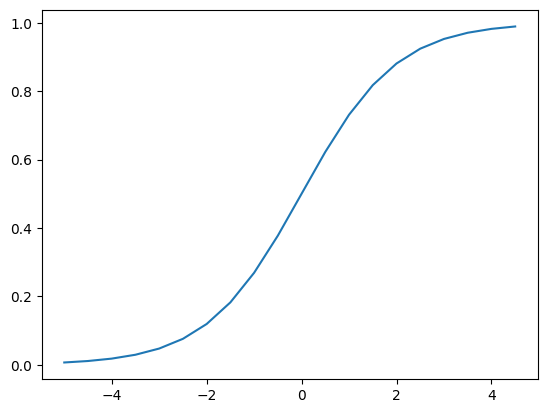

In [8]:
plt.plot(np.arange(-5,5,0.5),sig(np.arange(-5,5,0.5)))
plt.show()

Ex. 5. Based on the above formulas, please implement the cost function J (recommended vectorized solution):

In [9]:
def cost(theta, X, y):
    return np.sum(-(y*np.log(sig(theta.T@X)))-((1-y)*np.log(1 - sig(theta.T@X))))/(len(X[0]))

In [10]:
theta = np.zeros((X.shape[0], 1))
print(cost(theta=theta, X=X, y=y))


0.6931471805599453


Ex. 6.: Please implement simple gradient function:

In [11]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    for i in range(it):
        sigmoid = sig(theta.T@X)
        grad = np.sum((-y/(sigmoid+1e-5) + (1-y)/(1-sigmoid+1e-5))*sigmoid*(1-sigmoid)*X,axis=1)
        grad.shape = [grad.shape[0],1]
        theta = theta - alpha*grad
    
    return theta#, cost

def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    for i in range(it):
        sigmoid = sig(theta.T@X)
        grad = (1/len(X[0]))*np.sum((-y/(sigmoid+1e-5) + (1-y)/(1-sigmoid+1e-5))*sigmoid*(1-sigmoid)*X,axis=1)
        grad.shape = [grad.shape[0],1]
        theta = theta - alpha*grad
    
    return theta#, cost

theta = simple_gradient(X,y,theta,1,150)
print(theta)

[[1.41958745]
 [3.35943393]
 [3.11271737]]


Ex. 7.: Please present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5.

In [12]:
error_count = np.sum(np.abs((sig(theta.T@X) > 0.5).astype(int) - y)).astype(float)
accuracy = error_count/float(len(y[0]))
print(f"accuracy: {accuracy}")

accuracy: 0.11


Ex. 8.: It is sometimes useful to be able to visualize the boundary line dividing the input space in which points are classified as belonging to the class of interest (y=1) from that space in which point do not (y=0).

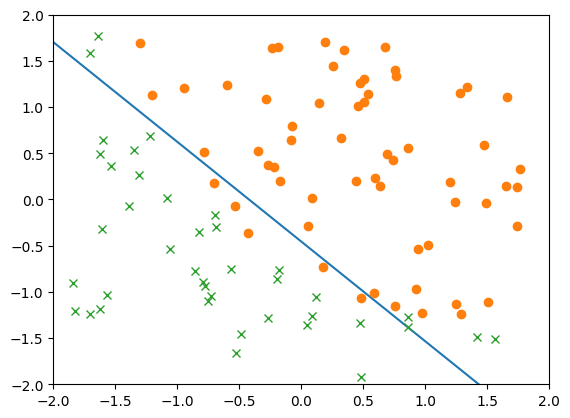

In [13]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o')
plt.plot(X1_0, X2_0, 'x')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

Multi-class logistic regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

Ex. 1.: Get yourself familiar with the object sklearn.linear_model.LogisticRegression and choose appropriate optimalization algorithm, regularization coefficient and create a regression model.

In [15]:
logreg = LogisticRegression(penalty = 'l2', solver = 'sag')
logreg.fit(X,Y)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

Ex. 2.: Create an instance and fit the data using fit method.

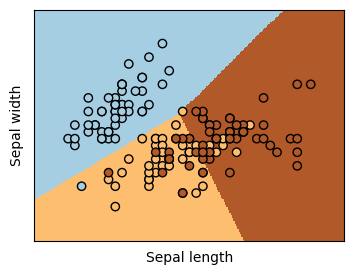

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

Ex. 3.: Using method predict_proba please predict the probability of being a member of a given class.

In [17]:
predictions = logreg.predict_proba(X)
print(f"""probability of prediction for each class: \n
{iris.target_names[0]}: {(np.sum(predictions,axis=0)/len(Y))[0]}\n
{iris.target_names[1]}: {(np.sum(predictions,axis=0)/len(Y))[1]}\n
{iris.target_names[2]}: {(np.sum(predictions,axis=0)/len(Y))[2]}\n""")

probability of prediction for each class: 

setosa: 0.33028131061306837

versicolor: 0.33316647934716015

virginica: 0.3365522100397717



Ex. 4.: Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2)

In [18]:
import sklearn.metrics as metrics
print("accuracy",metrics.accuracy_score(Y,(logreg.predict(X))))
print("log_loss",metrics.log_loss(Y,logreg.predict_proba(X)))


accuracy 0.8133333333333334
log_loss 0.4631597936476995


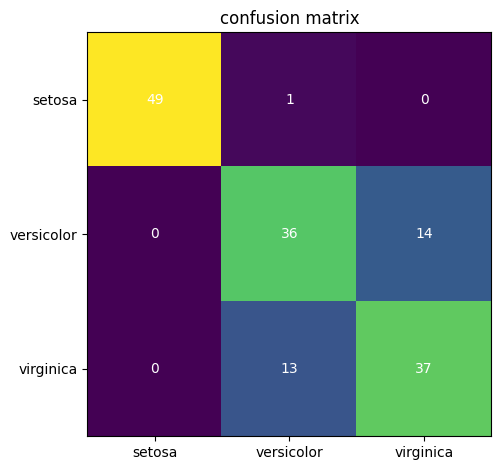

In [19]:
cf_mat = metrics.confusion_matrix(Y, logreg.predict(X))
fig, ax = plt.subplots()
im = ax.imshow(cf_mat)
ax.set_title("confusion matrix")
ax.set_xticks([i for i in range(len(iris.target_names))],iris.target_names)
ax.set_yticks([i for i in range(len(iris.target_names))],iris.target_names)
for i in range(len(cf_mat)):
    for j in range(len(cf_mat[0])):
        ax.text(j, i, cf_mat[i, j], ha="center", va="center", color="w")
fig.tight_layout()
plt.show()

In [20]:
#F1 , recall, score
print(f"recal: {metrics.recall_score(Y,(logreg.predict(X)),average='macro')}")
print(f"precision: {metrics.precision_score(Y,(logreg.predict(X)),average='macro')}")
print(f"F1: {metrics.f1_score(Y,(logreg.predict(X)),average='macro')}")

recal: 0.8133333333333334
precision: 0.8151633986928104
F1: 0.8141907524085742
